# LABORATORIUM 3 -  Prior and Posterior predictive distributions
## Bartosz Więcek

In [53]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

## Excercise 1 -  Modeling prior predictive distribution

In [54]:
gen_quant_1 = CmdStanModel(stan_file='/home/Lab_3/AD_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [55]:
samples_1 = gen_quant_1.sample(fixed_param=True, 
                               iter_sampling=1000, 
                               iter_warmup=0, 
                               chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


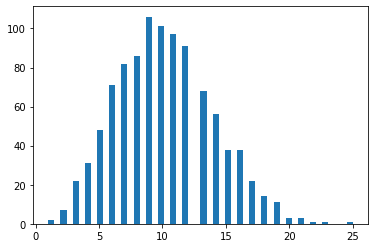

In [56]:
df_1 = samples_1.draws_pd()

plt.hist(df_1['y'], bins=50)
plt.show()

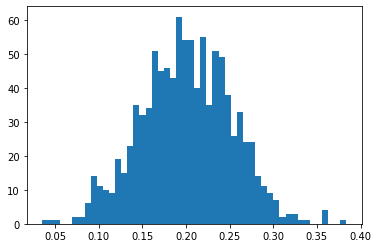

In [57]:
plt.hist(df_1['p'], bins=50)
plt.show()

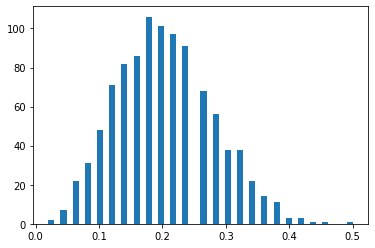

In [58]:
ratio_1 = pd.DataFrame(df_1['y'] / 50)
plt.hist(ratio_1, bins=50)
plt.show()

In [59]:
ratio_1.mean()

y    0.20262
dtype: float64

Mean of the ratio is consistent with prior knowledge.

## Excercise 2 - Modeling posterior and posterior predictive distribution

In [60]:
gen_quant_2 = CmdStanModel(stan_file='/home/Lab_3/AD_2.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [61]:
samples_2 = gen_quant_2.sample( data={'N': 50,
                                      'y': 7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


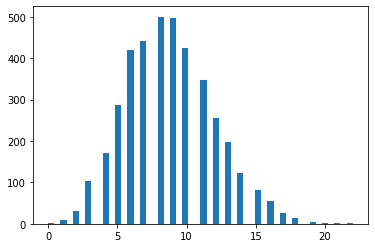

In [62]:
df_2 = samples_2.draws_pd()

plt.hist(df_2['y_pred'], bins=50)
plt.show()

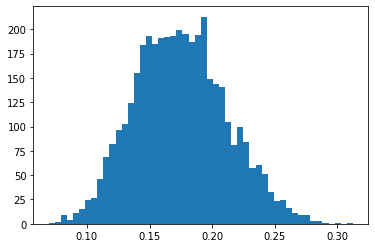

In [63]:
df_2 = samples_2.draws_pd()

plt.hist(df_2['p'], bins=50)
plt.show()

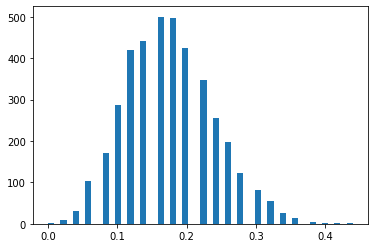

In [64]:
ratio_2 = pd.DataFrame(df_2['y_pred'] / 50)
plt.hist(ratio_2, bins=50)
plt.show()

In [65]:
ratio_2.mean()

y_pred    0.175075
dtype: float64

/usr/local/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (4000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


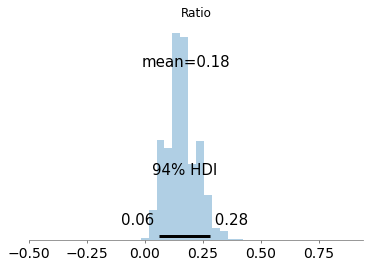

In [66]:
ratio_2 = ratio_2.to_numpy()
az.plot_posterior(ratio_2, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.title("Ratio")
plt.show()

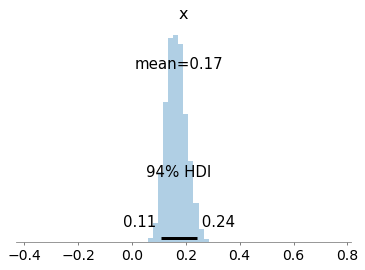

In [67]:
p_2 = df_2['p'].to_numpy()
az.plot_posterior(p_2, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.show()

In [68]:
ratio_2_mean = np.mean(ratio_2)
ratio_2_hdi = az.hdi(ratio_2, hdi_prob=0.94)
p_2_mean = np.mean(p_2)
p_2_hdi = az.hdi(p_2, hdi_prob=0.94)

print("Ratio:")
print("Mean: ", ratio_2_mean, "  94% HDI: ", ratio_2_hdi)

print("\np:")
print("Mean: ", p_2_mean, "  94% HDI: ", p_2_hdi)
print("\n")

Ratio:
Mean:  0.17507500000000004   94% HDI:  [[0.06 0.28]]

p:
Mean:  0.1749737606   94% HDI:  [0.107923 0.242097]




/tmp/ipykernel_24325/633682863.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ratio_2_hdi = az.hdi(ratio_2, hdi_prob=0.94)


In [69]:
ratio_2_lower_then_avg = np.mean(ratio_2 < 0.2)

print("Probability that ratio is lower than the average probability from traditional vaccines is egual to ", ratio_2_lower_then_avg)

Probability that ratio is lower than the average probability from traditional vaccines is egual to  0.6165
